# 특성 공학과 규제

- 무게를 예측한 결과
    - 직선 예측 문제로 무게가 - 가 나옴
    - 이 문제를 해결하기 위해 더 고차항을 포함시켜 진행
    - 문제점 : 항을 어디까지 높일 것인가? 수동으로 포함시키는것의 번거로움
    - 또다른 해결책
        - 피처를 더 수집
\       - 생선이라면 길이/두께
    - 선형회귀는 특성이 어느정도 많을수록 효과가 좋아진다

### 다중회귀
- 여러개의 특성을 사용한 선형 회귀
- 한개의 특성을 사용했을 때 선형회귀 모델을 직선을 학습한다.
- 두개의 특성을 사용하면 ????
    - 선형회귀는 평면을 학습

- 특성이 두개면 타깃값과 함께 3차원 공간을 형성함
- 타깃 = a X 특성1 + b X 특성2 + 절편 은 평면이 됨
   - 특성이 3개인 경우는??
       - 축이 하나 더 들어난다고 보면 됨
       - 특성이 많은 고차원에서는 선형 회귀가 매우 복잡한 공간을 표현       

- 길이 X 높이 등 새로운 특성도 만들어서 회귀식에 추가가능
    - 기존의 특성을 사용해 새로운 특성을 만들어 내는 것 : **특성공학**
    - 사인킷런의 PolynomialFeatures를 사용

- 단항 vs 다항 vs 다중

## 데이터 준비

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('https://bit.ly/perch_csv')
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [10]:
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [11]:
# 타깃데이터
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [12]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 다중 회귀 모델 훈련하기
- 다중 회귀, 단항 회귀 모두 선형회귀 모델로 훈련함
    - 여러개의 특성을 사용하여 선형회귀를 수행

In [ ]:
from sklearn.linear_model import LinearRegression


0.9559326821885706


0.8796419177546366


In [ ]:
# 회귀계수와 절편 확인
print()

[ 9.07538153 69.46401443 38.00385678] -599.1708082981099


- 무게 = 9.07xlength + 69.4xheight + 38xwidth - 599

- 한개의 특성에 대해 다항 회귀를 적용한 결과보다 더 성능이 떨어짐
    - 여러개의 특성에 대해 다항 회귀를 진행해보자

## 사이킷런의 변환기 설명

**사이킷런은 다항회귀를 위한 클래스를 명시적으로 제공하지 않음**

- 다항 회귀가 선형 회귀이므로 PolynomalFeatures 클래스를 통해 독립변수(피처)를 다항식 피처로 변환
    - 대신 다항 회귀 역시 선형 회귀이기 때문에  
        - 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현  

PolynomialFeatures(degree=차수,include_bias=True/False)
- include_bias는 절편을 항상 값이 1인 임의특성과 곱해지는 계수
    - 사잇킷런의 선형모델은 자동으로 절편을 추가하므로 특성을 만들 필요가 없음
    - ex. 무게 = a X 길이 + b X 높이 + c X 두께 + d X 1

fit_transform(피처) 


*PolynomialFeatures 클래스를 통해 피처를 다항식 피처로 변환 *  


PolynomialFeatures(degree=차수)  
PolynomialFeatures(degree=2) : 2차 다항식 

fit_transform(피처) 또는   
fit() / transform() 메소드를 사용해서 변환 작업 수행

***PolynomialFeatures 클래스로 다항식 변환***  
- 단항값을 2차 다항값으로 변환하는 예

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.array([2,3])
X = X.reshape(-1,1)


print(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr) #(1,X,X^2)

[[2]
 [3]]
변환된 2차 다항식 계수 feature:
 [[1. 2. 4.]
 [1. 3. 9.]]


In [17]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
np.random.seed(4)
# 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(6).reshape(3, 2)
print('일차 단항식 계수 feature:\n', X)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]
 [4 5]]


$y = 0X_1 + 1X_2$  
$y = 2X_1 + 3X_2$    
$y = 4X_1 + 5X_2$

In [18]:
#  PolynomialFeatures를 이용하여 
# degree = 2 인 2차 다항식으로 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

# transform from (x1, x2) to (1, x1, x2, x1^2, x1*x2, x2^2)

변환된 2차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


**transform (1, x1, x2, x1^2, x1*x2, x2^2)**  

$y = 1+0X_1 + 1X_2 + 0X_1^2 + 0 +1X_2^2$ 

$y = 1+2X_1 + 3X_2 + 4X_1^2 + 6 +9X_2^2$  

$y = 1+4X_1 + 5X_2 + 16X_1^2 + 20 +25X_2^2$ 

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# bias 포함
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
# bias 불포함
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


## 학습데이터에 대하여 다항식 변경

In [23]:
print(train_poly.shape)

(42, 9)


array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

0.9903183436982125


0.9714559911594155


- 길이, 높이, 두께 및 다항 특성을 이용
    - 한개의 특성일때나 다중회귀를 진행 했을 때 보다 성능이 향상됨

## 특성을 더 많이 추가 해보자
- 독립 특성의 수집이 어려우니 
    - 3,4 제곱등의 특성을 추가해보자

In [ ]:
# 기존 학습데이터에 대하여 5제곱까지의 특성 생성


In [21]:
# 특성의 개수가 55개
print(train_poly.shape)

(42, 55)


- **샘플 갯수보다 특성이 더 많다**

In [ ]:
# 다항데이터로 재학습

print(lr.score(train_poly, train_target))

0.999999999997515


In [ ]:
# 테스트 데이터 스코어
print(lr.score(test_poly, test_target))

-144.40196592191958


- 특성을 늘리면 훈련데이터에 대해 거의 완벽하게 학습
    - 훈련세트에 과대적합됨
    - 단, 훈련세트에는 완벽하지만 훈련세트에만 완벽하고 나머지 데이터(테스트세트)에는 성능이 형편없어진다
        - **특히, 지금 예제처럼 샘플갯수보다 특성갯수가 더 많으면 훈련세트에 대해서는 완벽한 훈련을 하게된다.**

## 규제
- 머신러닝 모델이 훈련세트에 대해 너무 과도하게 학습하지 못하도록 훼방하는 것
    - 즉, 모델이 훈련세트에 과대적합되지 않도록 만드는 것
    - **선형회귀 모델의 경우 특성에 곱해지는 계수(기울기)의 크기를 작게 만드는 것**
    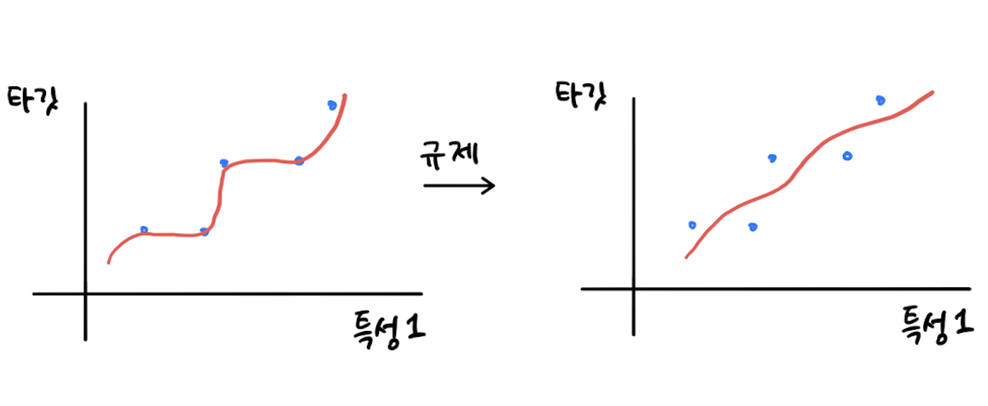

### 스케일
- 규제를 적용할 때 특성값의 크기가 차이가 많이 나면 공정하게 제어되지 않음
    - 규제 적용 전 정규화를 하는것이 일반적임
    - 표준 정규화 진행

In [ ]:
# 표준 정규화
from sklearn.preprocessing import StandardScaler



### 릿지 vs 라쏘
- 선형회귀 모델에 규제를 적용한 알고리즘
    - 계수의 크기를 줄인다
- 릿지 : 계수를 제곱한 값을 기준으로 규제를 적용
    - 보통 릿지를 조금 더 선호 함
        - 계수의 크기를 아주 작게 줄일수는 있지만 0으로 만들지는 않는다        
- 라쏘 : 계수의 절대값을 기준으로 규제를 적용
    - 라쏘는 계수를 아예 0으로 만들수도 있음

## 릿지

In [ ]:
from sklearn.linear_model import Ridge



0.9896101671037343


- 5차항을 이용한 다항 회귀
- 규제 적용 전보다 훈련점수가 약간 낮아짐

0.979069397761539


- 테스트 점수가 정상적으로 돌아옴

## **선형 모델의 RSS 최소화하는 비용함수의 한계점**
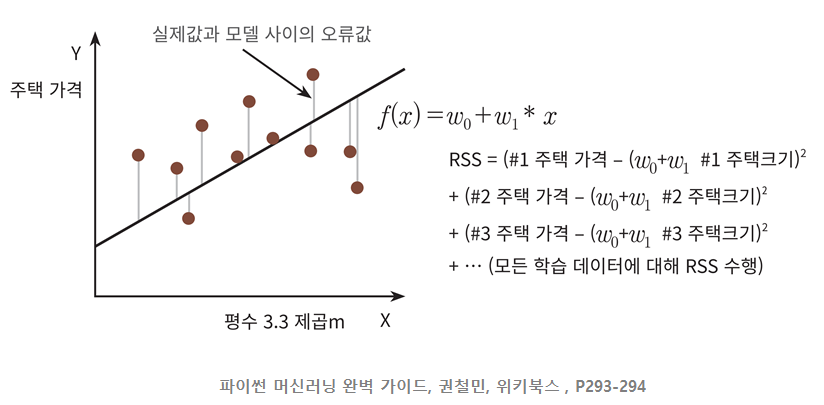
- **RSS는 실제값과 예측값의 절대 오차의 합**
- 실제값과 예측값 차이를 최소화하는 것만 고려함에 따라
- 학습 데이터에 지나치게 맞추게 되고 회귀계수가 쉽게 커짐
- 이러한 경우 변동성이 심해져서 테스트 데이터세트에서 예측성능이 저하되기 쉬움

- 학습 데이터의 잔차 오류 값을 최소로 하는 RSS 최소화와 과적합을 방지하기 위해 회귀계수값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야 함

- 회귀 계수의 크기를 제어해 과적합을 개선하려면 비용(cost) 함수의 목표는
    - $ RSS(W) + alpha*||W||_2^2$ 를 최소화하는 것으로 변경해야 함
    - tip. ||W|| => Norm은 벡터의 길이 혹은 크기를 측정하는 방법(함수)
        - Norm이 측정한 벡터의 크기는 원점에서 벡터 좌표까지의 거리임
        - 옆의 수치는 차원을 의미함. 즉 $||W||_2^2$ 는 2차원 노름


#### 비용 함수 목표 수식 
$ 비용함수목표 = Min(RSS(W) + alpha*||W||_2^2 )$

- $alpha$=0인 경우 : $W$가 커도 $alpha*||W||_2^2$가 0이 되어 비용함수는 $Min(RSS(W))$

- $alpha$=무한대인 경우 : $alpha*||W||_2^2$가 무한대가 되어 너무 커지므로 비용함수는 $W$를 0에 가깝게 최소화해야 함 

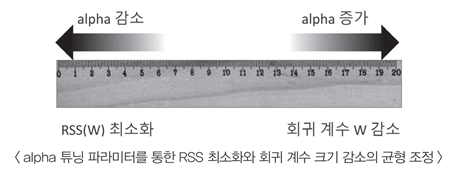

- **설명자료** : 다시 말하자면 alpha를 0에서부터 증가시키면서 회귀 계수 값의 크기를 감소시킬 수 있음. 최소값을 찾기 때문에 alpha가 커지면 W가 작아져야 Min()을 찾을 수 있음
    - 이렇게 비용 함수에 alpha값을 통해서 패널티를 부여해 회귀 계수의 값 크기를 감소시키면서 과적합을 개선해 나가는 방식을 규제(Regularization)라고 함


* alpha : 학습 데이터 적합 정도와 회귀 계수 값의 크기를 제어하는 튜닝 파라미터(규제 강도)  
* **W : 회기 계수**

### 규제의 양을 조절
- alpha 값 : 사전에 사이언티스트가 조절하는 값(하이퍼 파라미터)
    - alpha값이 크면 규제 강도가 세지므로 계수값을 더 줄이고 조금 더 과소적합 되도록 유도
    - alpha값이 작으면 계수를 줄이는 역할이 줄어들고 선형회귀 모델과 유사해 짐
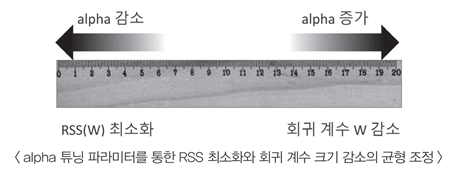
- 적절한 alpha값을 찾는 방법
    - alpha값에 대한 R2 값의 그래프를 그려보는 것
        - 훈련세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 alpha 값이 됨

In [27]:
# alpha값에 따른 train/test score 저장을 위한 list 생성
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:


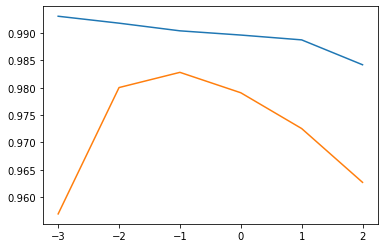

In [ ]:

plt.show()

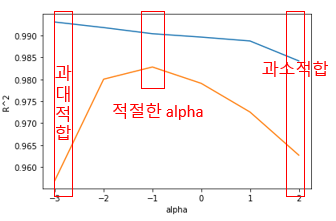
- log10한 -1 이 가장 적절
- np.log10(0.1) == -1
    - log10한 -1 ==> 10<sup>-1</sup> == 0.1

In [30]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.982797646538678


- 훈련세트와 테스트 세트 점수 모두 비슷하게 높고 
    - 과대적합과 과소적합 균형을 맞추고 있음

In [ ]:

coef_df

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature,coef
0,x0,27.619335
1,x1,-1.640222
2,x2,-19.732560
3,x0^2,30.030620
4,x0 x1,16.998003
5,x0 x2,17.832473
6,x1^2,4.469283
7,x1 x2,3.872585
8,x2^2,22.835182
9,x0^3,19.504175


## 라쏘

In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [33]:
print(lasso.score(test_scaled, test_target))

0.9800593698421886


In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


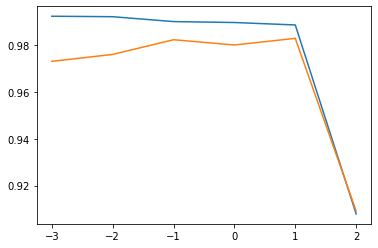

In [ ]:

plt.show()

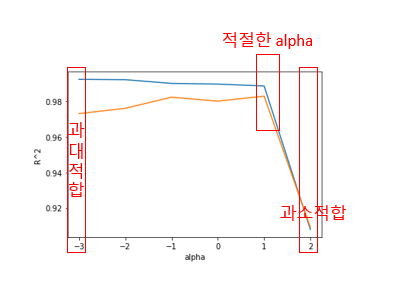
- log10한 1 이 가장 적절
- np.log10(10) == 1
    - log10한 1 ==> 10<sup>1</sup> == 10

In [ ]:


print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


- 과대 적합을 잘 억제하고 테스트의 성능을 높임

### 라쏘모델의 특징
- 라쏘 모델은 회귀 계수를 0으로 만드는 성향이 있음
- 계수(coef_)가 0인 특성의 개수  확인

In [ ]:
print()

40


- 55개의 특성 중 40개의 특성의 계수가 0으로 변환
    - 15개의 특성만 활용해서 모델링 진행되었음
        - 라쏘는 모델에 유용한 특성을 골라내는 용도로도 사용 가능

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
coef_df[coef_df.coef != 0]

,feature,coef
3,x0^2,12.148525
4,x0 x1,55.448564
5,x0 x2,42.231008
8,x2^2,13.705962
10,x0^2 x1,43.218595
11,x0^2 x2,5.703378
12,x0 x1^2,47.462545
13,x0 x1 x2,7.423094
14,x0 x2^2,11.858234
17,x1 x2^2,13.530382
